# Finding the Maximal Point of a Function

The function we analyze is: $f(x) = e^{-x/4} \cdot \arctan x$ Our objective is to confirm that the maximal point is given by the equation: $\arctan x - \frac{4}{x^2 + 1} = 0.$
---
## Differentiating the Function Using the Product Rule
Given: $f(x) = e^{-x/4} \cdot \arctan x$
The derivative follows the product rule: $\textbf f'(x) = f_1'(x) \cdot f_2(x) + f_1(x) \cdot f_2'(x),$
where:
- $\textbf f_1(x) = e^{-x/4}$
- $\textbf f_2(x) = \arctan x$
### Step 1: Compute Each Derivative
**Derivative of $e^{-x/4}$:**
$$
f_1'(x) = \frac{d}{dx} e^{-x/4} = e^{-x/4} \cdot \left(-\frac{1}{4}\right) = -\frac{1}{4} e^{-x/4}
$$
**Derivative of $\arctan x$:**
$$
f_2'(x) = \frac{d}{dx} \arctan x = \frac{1}{x^2 + 1}
$$

---
### Step 2: Apply the Product Rule

$$
f'(x) = \left(-\frac{1}{4} e^{-x/4} \cdot \arctan x\right) + \left(e^{-x/4} \cdot \frac{1}{x^2 + 1}\right)
$$

Factoring out $\textbf e^{-x/4}$:

$$
f'(x) = e^{-x/4} \left(-\frac{1}{4} \arctan x + \frac{1}{x^2 + 1}\right)
$$

---



## Finding the Maximal Point

To find the critical points, we set $f'(x) = 0$: $e^{-x/4} \left(-\frac{1}{4} \arctan x + \frac{1}{x^2 + 1}\right) = 0$

Since $\textbf e^{-x/4}$ is never zero, we solve: $ -\frac{1}{4} \arctan x + \frac{1}{x^2 + 1} = 0 $
Multiplying both sides by 4: $ \arctan x - \frac{4}{x^2 + 1} = 0$
Thus, the maximal point of the function is given by: $ \arctan x - \frac{4}{x^2 + 1} = 0 $


## Using Neoten Raphson

Newton's method is given by:

$x_{n+1} = x_n - \frac{g(x)}{g'(x)}$

where:

$g(x) = \arctan x - \frac{4}{x^2 + 1}$

Computing the derivative:

$\frac{d}{dx} \arctan x = \frac{1}{x^2 + 1}$

Using the quotient rule:

$\left( \frac{4}{x^2 + 1} \right)' = \frac{0 \cdot (x^2 +1) - 4 \cdot (2x)}{(x^2 + 1)^2} = \frac{-8x}{(x^2 + 1)^2}$

Thus, we obtain:

$g'(x) = \frac{1}{x^2 + 1} + \frac{8x}{(x^2 + 1)^2}$





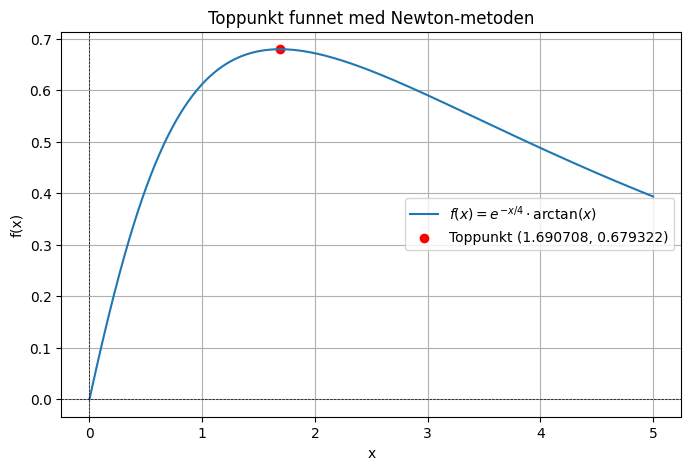

Topppunktet oppgitt ved:


(1.6907, 0.6793)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definrer funksjonen g(x)` og dens derivert g(x)``
def g(x):
    return np.arctan(x) - 4 / (x**2 + 1)

def g_deriv(x):
    return 1 / (x**2 + 1) + (8 * x) / (x**2 + 1)**2

# Newton-Raphson-metoden gitt ved
def newton_raphson_solver(func_deriv, andre_func_deriv, x0, 
                          tol=1e-6, max_iter=100):
    x_n = x0  # Startverdien
    for _ in range(max_iter):
        f_val = func_deriv(x_n)
        andre_f_deriv_val = andre_func_deriv(x_n)

        # Unngår deling med null
        if abs(andre_f_deriv_val) < 1e-10:
            break

        x_next = x_n - f_val / andre_f_deriv_val

        if abs(x_next - x_n) < tol:
            return x_next

        x_n = x_next

    return x_n

# Startverdi 
x_start = 2.0

# Finner x-verdien til toppunktet
x_toppunkt = newton_raphson_solver(g, g_deriv, x_start)

# Finner y-verdien i toppunktet ved å sette x_toppunkt inn i f(x)
y_toppunkt = np.exp(-x_toppunkt / 4) * np.arctan(x_toppunkt)

# Plott funksjonen og markerer toppunktet i grafen
x_vals = np.linspace(0, 5, 400)
y_vals = np.exp(-x_vals / 4) * np.arctan(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, 
         label=r"$f(x) = e^{-x/4} \cdot \arctan(x)$")
plt.scatter([x_toppunkt], [y_toppunkt], color='red', 
            label=f"Toppunkt ({x_toppunkt:.6f}, {y_toppunkt:.6f})")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.title("Toppunkt funnet med Newton-metoden")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Vis plottet
plt.show()

# Returner toppunktet numerisk etter 
# str igjen til float. fjerner numpy
print("Topppunktet oppgitt ved:")
float(str(round(x_toppunkt, 4))), float(str(round(y_toppunkt, 4)))


